In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 讀取 libraries
import numpy as np
from numpy import argmax
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import auc, roc_curve, roc_auc_score, classification_report
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# 設定當前工作目錄
import os
path="/content/drive/MyDrive/wafer/"
os.chdir(path)
print(os.listdir(path))

['wafer-defect-classification-by-deep-learning.ipynb', 'Untitled1.ipynb', 'Wafer detection.ipynb', 'wafer.zip', 'LSWMD.pkl', 'Wafer anomaly detection_AutoEncoder.ipynb', 'Wafer anomaly detection_Denoising AutoEncoder.ipynb', 'Wafer anomaly detection.ipynb', 'Wafer classification_KFold.ipynb', 'Wafer classification_Densenet201_PyTorch.ipynb', 'Wafer classification_Densenet201_v2.ipynb', 'rawdata.npz', 'Wafer preprocess.ipynb', 'model', 'wafer_detection_densenet_model.h5', 'Wafer classification_EfficientNetB7.ipynb', 'Wafer_classification_Densenet201.ipynb', 'Wafer_classification_Inception_v3.ipynb', 'wafer_detection_mobilenet_model.h5', 'Wafer_classification_MobileNet_V2.ipynb', 'wafer_detection_resnet_model.h5', 'Wafer_classification_ResNet101.ipynb', 'wafer_detection_xception_model.h5', 'Wafer_classification_Xception.ipynb', 'wafer_detection_efficientnet_model.h5', 'Wafer_classification_EfficientNetB7 (1).ipynb', 'Model_evaluation_comparison.ipynb']


In [3]:
# 讀取模型
Mobilenet = tf.keras.models.load_model(os.path.join(path + "model/Mobilenet"))
Resnet = tf.keras.models.load_model(os.path.join(path + "model/Resnet"))
Densenet = tf.keras.models.load_model(os.path.join(path + "model/Densenet"))
Xception = tf.keras.models.load_model(os.path.join(path + "model/Xception"))

In [4]:
# 讀取測試資料(npz壓縮檔)
df=np.load('rawdata.npz')
X_test = df['X_test']
y_test = df['y_test']
df.close()

In [5]:
# Evaluation
score_M = Mobilenet.evaluate(X_test, y_test)
print('Test Accuracy:', score_M[1])
score_R = Resnet.evaluate(X_test, y_test)
print('Test Accuracy:', score_R[1])
score_D = Densenet.evaluate(X_test, y_test)
print('Test Accuracy:', score_D[1])
score_X = Xception.evaluate(X_test, y_test)
print('Test Accuracy:', score_X[1])

160/160 [==============================] - 22s 121ms/step - loss: 0.3875 - accuracy: 0.8664
Test Accuracy: 0.8663793206214905
160/160 [==============================] - 138s 841ms/step - loss: 0.3726 - accuracy: 0.9001
Test Accuracy: 0.9000783562660217
160/160 [==============================] - 108s 647ms/step - loss: 0.2972 - accuracy: 0.9026
Test Accuracy: 0.9026253819465637
160/160 [==============================] - 89s 545ms/step - loss: 0.4444 - accuracy: 0.8470
Test Accuracy: 0.8469827771186829


In [6]:
# 將預測值轉換為二進位的矩陣向量
def ConverToBinary(x):
  onehot_encoder = OneHotEncoder(sparse=False)
  x = x.reshape(len(x), 1)
  x = onehot_encoder.fit_transform(x)
  return x

In [7]:
def Prediction(x):
  pred = x.predict(X_test)
  pred = np.argmax(pred, axis=1)
  return pred

In [8]:
# 取出真實值類別
true = np.argmax(y_test, axis=1)

In [9]:
M_pre = Prediction(Mobilenet)
R_pre = Prediction(Resnet)
D_pre = Prediction(Densenet)
X_pre = Prediction(Xception)

160/160 [==============================] - 88s 544ms/step


In [10]:
bar_plot_value = {}

In [11]:
# 混淆矩陣 (Confusion Matrix) - MobileNet
M_cm = classification_report(true, M_pre, output_dict=True)
bar_plot_value['MobileNet'] = M_cm['accuracy']
print(classification_report(true, M_pre))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       859
           1       0.72      0.83      0.77       111
           2       0.80      0.79      0.79      1038
           3       0.96      0.97      0.96      1936
           4       0.71      0.79      0.75       719
           5       0.86      0.80      0.83       173
           6       0.61      0.40      0.49       238
           7       0.90      0.87      0.88        30

    accuracy                           0.87      5104
   macro avg       0.81      0.80      0.80      5104
weighted avg       0.87      0.87      0.86      5104



In [12]:
# 混淆矩陣 (Confusion Matrix) - ResNet
R_cm = classification_report(true, R_pre, output_dict=True)
bar_plot_value['ResNet'] = R_cm['accuracy']
print(classification_report(true, R_pre))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       859
           1       0.88      0.84      0.86       111
           2       0.82      0.88      0.85      1038
           3       0.98      0.97      0.97      1936
           4       0.78      0.77      0.78       719
           5       0.88      0.85      0.86       173
           6       0.77      0.61      0.68       238
           7       0.91      0.97      0.94        30

    accuracy                           0.90      5104
   macro avg       0.87      0.86      0.86      5104
weighted avg       0.90      0.90      0.90      5104



In [13]:
# 混淆矩陣 (Confusion Matrix) - DenseNet
D_cm = classification_report(true, D_pre, output_dict=True)
bar_plot_value['DenseNet'] = D_cm['accuracy']
print(classification_report(true, D_pre))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       859
           1       0.82      0.85      0.83       111
           2       0.86      0.88      0.87      1038
           3       0.97      0.97      0.97      1936
           4       0.77      0.82      0.80       719
           5       0.90      0.86      0.88       173
           6       0.73      0.54      0.62       238
           7       0.88      0.97      0.92        30

    accuracy                           0.90      5104
   macro avg       0.86      0.85      0.86      5104
weighted avg       0.90      0.90      0.90      5104



In [14]:
# 混淆矩陣 (Confusion Matrix) - Xception
X_cm = classification_report(true, X_pre, output_dict=True)
bar_plot_value['Xception'] = X_cm['accuracy']
print(classification_report(true, X_pre))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       859
           1       0.77      0.56      0.65       111
           2       0.76      0.80      0.78      1038
           3       0.97      0.95      0.96      1936
           4       0.64      0.80      0.71       719
           5       0.88      0.77      0.82       173
           6       0.68      0.26      0.38       238
           7       0.64      0.70      0.67        30

    accuracy                           0.85      5104
   macro avg       0.78      0.72      0.74      5104
weighted avg       0.85      0.85      0.84      5104



In [15]:
eval_df = np.array(
            [
              [
               round(bar_plot_value['MobileNet'], 3),
               round(bar_plot_value['ResNet'], 3),
               round(bar_plot_value['DenseNet'], 3),
               round(bar_plot_value['Xception'], 3)
              ]
            ]
          )

eval_df = pd.DataFrame(eval_df, columns=['MobileNet', 'ResNet', 'DenseNet', 'Xception'])
rowname = np.array(['Accuracy'])
eval_df.index = rowname
eval_df

,MobileNet,ResNet,DenseNet,Xception
Accuracy,0.866,0.9,0.903,0.847


In [16]:
true_roc = ConverToBinary(true)

In [17]:
D_roc = ConverToBinary(D_pre)

In [18]:
# 計算 AUC 值
test_auc = roc_auc_score(true_roc, D_roc)

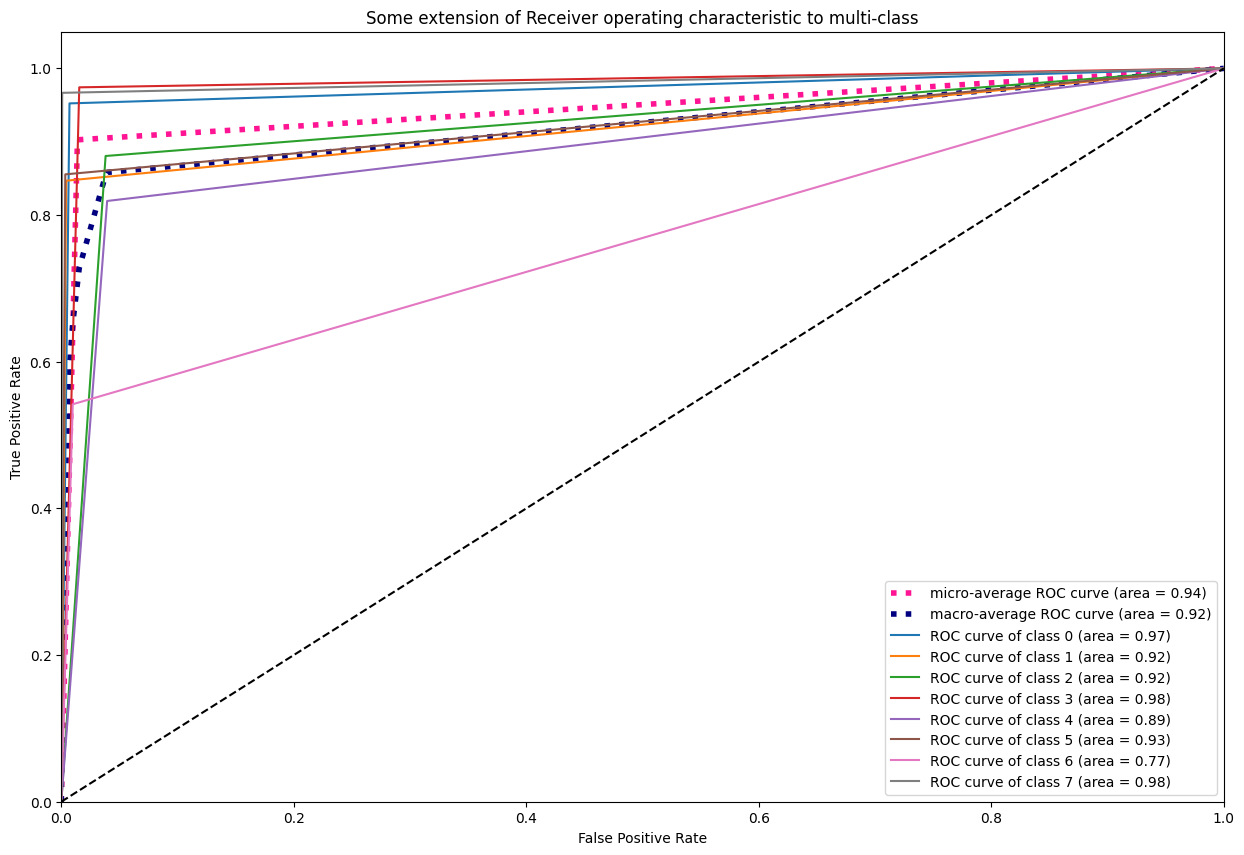

In [19]:
# ROC 圖
n_classes = 8

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(true_roc[:, i], D_roc[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(true_roc.ravel(), D_roc.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
  mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot
plt.figure(figsize=(15, 10))

plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

for i in range(n_classes):
  plt.plot(fpr[i], tpr[i],
      label='ROC curve of class {0} (area = {1:0.2f})'
      ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()